# Comparison of Boercker and More Ornsten-Zernike 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.hnc import  Integral_Equation_Solver as OZ
from hnc.hnc.hnc_BandM import Integral_Equation_Solver as IET
from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

from pandas import read_csv

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100


ModuleNotFoundError: No module named 'mendeleev'


## Comparison to Shaffer

In [2]:
Γi = 4
Γe = 0.1

Ti = 1*eV_to_AU
Te = Γi/Γe*Ti
print(f"T_i = {Ti*AU_to_K:0.2f} [K]")
print(f"T_e = {Te*AU_to_K:0.2f} [K]")

Zi, Ze = 1, 1

ri = Zi**2/Ti/Γi
re = Ze**2/Te/Γe

ni = n_from_rs(ri)
ne = n_from_rs(re)

rei = rs_from_n(ni + ne)

m_i = m_e*30

Qsquare_matrix = np.array( [[Ze**2, Zi*Ze ],[Zi*Ze, Zi**2]])
Qsquare_matrix


T_i = 11604.53 [K]
T_e = 464181.00 [K]


array([[1, 1],
       [1, 1]])

In [3]:
n_in_rs_array = np.array([ 3/(4*π*re**3/rei**3), 3/(4*π*ri**3/rei**3)] )
T_AU_array = np.array([Te, Ti])
mass_array = np.array([m_e, m_i])

κ_screen = 0
κ_multiscale = 0.01

R_max, N_bins = 20, 1000
dst_type = 4

In [4]:
# New solver
iet = IET(2, n_in_rs_array, T_AU_array, κ_screen=0.0, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, use_U00_svt_correction=True, dst_type = dst_type)
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

iet.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-3, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20,dont_check=True)

0: Initial condition Total Error: 8.354e+00
1: Change in U_r: 2.888e-03, HNC Error: 1.125e-01, Total Error: 8.346e+00
2: Change in U_r: 2.884e-03, HNC Error: 1.125e-01, Total Error: 8.338e+00
3: Change in U_r: 2.880e-03, HNC Error: 1.125e-01, Total Error: 8.330e+00
4: Change in U_r: 2.876e-03, HNC Error: 1.125e-01, Total Error: 8.322e+00
5: Change in U_r: 2.873e-03, HNC Error: 1.125e-01, Total Error: 8.314e+00
6: Change in U_r: 2.869e-03, HNC Error: 1.125e-01, Total Error: 8.306e+00
7: Change in U_r: 2.865e-03, HNC Error: 1.124e-01, Total Error: 8.298e+00
8: Change in U_r: 2.862e-03, HNC Error: 1.124e-01, Total Error: 8.290e+00
9: Change in U_r: 2.858e-03, HNC Error: 1.124e-01, Total Error: 8.282e+00
10: Change in U_r: 2.855e-03, HNC Error: 1.124e-01, Total Error: 8.274e+00
11: Change in U_r: 2.851e-03, HNC Error: 1.124e-01, Total Error: 8.266e+00
12: Change in U_r: 2.848e-03, HNC Error: 1.124e-01, Total Error: 8.258e+00
13: Change in U_r: 2.844e-03, HNC Error: 1.124e-01, Total Error: 

/home/zach/plasma/hnc/hnc/hnc_BandM.py:432: RuntimeWarning: overflow encountered in exp
  tot_eqn =  1 + h_r_matrix  - np.exp(-self.β_list[np.newaxis,:,np.newaxis]*self.u_s_r_matrix + h_r_matrix + self.β_list[np.newaxis,:,np.newaxis]* U_s_r_matrix )
/home/zach/plasma/hnc/hnc/hnc_BandM.py:466: RuntimeWarning: overflow encountered in exp
  h_r_matrix = -1 + np.exp(γs_r_matrix - self.β_list[np.newaxis,:,np.newaxis] * self.u_s_r_matrix) # 2. γ_r,u_s_r  -> h_r   (HNC)
/home/zach/plasma/hnc/hnc/hnc_BandM.py:548: RuntimeWarning: overflow encountered in exp
  hnc_err = np.linalg.norm(- 1 - self.h_r_matrix   + np.exp( -self.u_r_matrix + self.h_r_matrix - self.U_r_matrix ))/np.sqrt(self.N_bins*self.N_species**2)


450: Change in U_r: 1.224e-01, HNC Error: 1.435e+06, Total Error: inf
451: Change in U_r: 1.218e-01, HNC Error: 2.237e+05, Total Error: inf
452: Change in U_r: 1.212e-01, HNC Error: 5.560e+04, Total Error: inf
453: Change in U_r: 1.206e-01, HNC Error: 2.641e+04, Total Error: inf
454: Change in U_r: 1.200e-01, HNC Error: 2.328e+04, Total Error: inf
455: Change in U_r: 1.195e-01, HNC Error: 2.438e+04, Total Error: inf
456: Change in U_r: 1.189e-01, HNC Error: 2.617e+04, Total Error: inf
457: Change in U_r: 1.183e-01, HNC Error: 2.817e+04, Total Error: inf
458: Change in U_r: 1.178e-01, HNC Error: 3.031e+04, Total Error: inf
459: Change in U_r: 1.172e-01, HNC Error: 3.260e+04, Total Error: inf
460: Change in U_r: 1.167e-01, HNC Error: 3.506e+04, Total Error: inf
461: Change in U_r: 1.161e-01, HNC Error: 3.775e+04, Total Error: inf
462: Change in U_r: 1.156e-01, HNC Error: 4.071e+04, Total Error: inf
463: Change in U_r: 1.151e-01, HNC Error: 4.767e+04, Total Error: inf
464: Change in U_r: 

/home/zach/plasma/hnc/hnc/hnc_BandM.py:329: RuntimeWarning: overflow encountered in multiply
  product[0,0] = A[0,0]*B[0,0] + A[0,1]*B[1,0]
/home/zach/plasma/hnc/hnc/hnc_BandM.py:432: RuntimeWarning: invalid value encountered in subtract
  tot_eqn =  1 + h_r_matrix  - np.exp(-self.β_list[np.newaxis,:,np.newaxis]*self.u_s_r_matrix + h_r_matrix + self.β_list[np.newaxis,:,np.newaxis]* U_s_r_matrix )
/home/zach/plasma/hnc/hnc/hnc_BandM.py:310: RuntimeWarning: overflow encountered in multiply
  det = A_matrix[0,0]*A_matrix[1,1] - A_matrix[1,0]*A_matrix[0,1]
/home/zach/plasma/hnc/hnc/hnc_BandM.py:330: RuntimeWarning: overflow encountered in multiply
  product[0,1] = A[0,0]*B[0,1] + A[0,1]*B[1,1]
/home/zach/plasma/hnc/hnc/hnc_BandM.py:329: RuntimeWarning: invalid value encountered in multiply
  product[0,0] = A[0,0]*B[0,0] + A[0,1]*B[1,0]
/home/zach/plasma/hnc/hnc/hnc_BandM.py:330: RuntimeWarning: invalid value encountered in multiply
  product[0,1] = A[0,0]*B[0,1] + A[0,1]*B[1,1]
/home/zach/

911: Change in U_r: nan, HNC Error: nan, Total Error: nan
912: Change in U_r: nan, HNC Error: nan, Total Error: nan
913: Change in U_r: nan, HNC Error: nan, Total Error: nan
914: Change in U_r: nan, HNC Error: nan, Total Error: nan
915: Change in U_r: nan, HNC Error: nan, Total Error: nan
916: Change in U_r: nan, HNC Error: nan, Total Error: nan
917: Change in U_r: nan, HNC Error: nan, Total Error: nan
918: Change in U_r: nan, HNC Error: nan, Total Error: nan
919: Change in U_r: nan, HNC Error: nan, Total Error: nan
920: Change in U_r: nan, HNC Error: nan, Total Error: nan
921: Change in U_r: nan, HNC Error: nan, Total Error: nan
922: Change in U_r: nan, HNC Error: nan, Total Error: nan
923: Change in U_r: nan, HNC Error: nan, Total Error: nan
924: Change in U_r: nan, HNC Error: nan, Total Error: nan
925: Change in U_r: nan, HNC Error: nan, Total Error: nan
926: Change in U_r: nan, HNC Error: nan, Total Error: nan
927: Change in U_r: nan, HNC Error: nan, Total Error: nan
928: Change in

1

In [5]:
# Old solver
Tei = (Te*m_i + Ti*m_e)/(m_e + m_i) 
T_SVT_matrix = np.array( [[Te, Tei ],[Tei, Ti  ]]  )
oz = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 8.359e+00
1: Change in c_r: 3.111e-02, HNC Error: 3.327e-02, Total Error: 7.551e+00
2: Change in c_r: 2.995e-02, HNC Error: 2.952e-02, Total Error: 6.821e+00
3: Change in c_r: 2.883e-02, HNC Error: 2.699e-02, Total Error: 6.161e+00
4: Change in c_r: 2.775e-02, HNC Error: 2.509e-02, Total Error: 5.565e+00
5: Change in c_r: 2.672e-02, HNC Error: 2.350e-02, Total Error: 5.025e+00
6: Change in c_r: 2.572e-02, HNC Error: 2.214e-02, Total Error: 4.538e+00
7: Change in c_r: 2.476e-02, HNC Error: 2.101e-02, Total Error: 4.098e+00
8: Change in c_r: 2.383e-02, HNC Error: 2.003e-02, Total Error: 3.700e+00
9: Change in c_r: 2.293e-02, HNC Error: 1.911e-02, Total Error: 3.341e+00
10: Change in c_r: 2.207e-02, HNC Error: 1.833e-02, Total Error: 3.016e+00
11: Change in c_r: 2.123e-02, HNC Error: 1.763e-02, Total Error: 2.723e+00
12: Change in c_r: 2.043e-02, HNC Error: 1.700e-02, Total Error: 2.459e+00
13: Change in c_r: 1.965e-02, HNC Error: 1.645e-02, Total Error: 

0

In [6]:
# Old solver
svt = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='svt', dst_type = dst_type)
svt.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/rei* np.exp(-svt.r_array[np.newaxis,np.newaxis,:]*κ_screen))

svt.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 8.354e+00
1: Change in c_r: 3.059e-02, HNC Error: 3.321e-02, Total Error: 7.547e+00
2: Change in c_r: 2.942e-02, HNC Error: 2.944e-02, Total Error: 6.817e+00
3: Change in c_r: 2.830e-02, HNC Error: 2.694e-02, Total Error: 6.158e+00
4: Change in c_r: 2.723e-02, HNC Error: 2.502e-02, Total Error: 5.561e+00
5: Change in c_r: 2.619e-02, HNC Error: 2.345e-02, Total Error: 5.022e+00
6: Change in c_r: 2.519e-02, HNC Error: 2.211e-02, Total Error: 4.535e+00
7: Change in c_r: 2.422e-02, HNC Error: 2.094e-02, Total Error: 4.095e+00
8: Change in c_r: 2.329e-02, HNC Error: 1.996e-02, Total Error: 3.698e+00
9: Change in c_r: 2.240e-02, HNC Error: 1.906e-02, Total Error: 3.338e+00
10: Change in c_r: 2.153e-02, HNC Error: 1.824e-02, Total Error: 3.014e+00
11: Change in c_r: 2.070e-02, HNC Error: 1.754e-02, Total Error: 2.721e+00
12: Change in c_r: 1.989e-02, HNC Error: 1.693e-02, Total Error: 2.457e+00
13: Change in c_r: 1.912e-02, HNC Error: 1.636e-02, Total Error: 

0

In [7]:
# iet.plot_species_convergence_c(n_slices = len(iet.h_r_matrix_list[::100]))

In [8]:
# svt.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::100]))

In [9]:
# fig, ax =  iet.plot_u_all_species()
# ax.plot(iet.r_array, iet.U_r_matrix[0,0],'--', label=r"$U_{0,0}$")
# ax.plot(iet.r_array, iet.U_r_matrix[0,1],'--', label=r"$U_{0,1}$")
# ax.plot(iet.r_array, iet.U_r_matrix[1,1],'--', label=r"$U_{1,1}$")
# plt.legend(loc='upper right')

### Data from Nathaniel and Scott

In [10]:
from pandas import read_csv

# gii_data = read_csv("Shaffer2017_Fig2c_ii.txt", delim_whitespace=True, header=2)
# gei_data = read_csv("Shaffer2017_Fig2c_ei.txt", delim_whitespace=True, header=2)
# gee_data = read_csv("Shaffer2017_Fig2c_ee.txt", delim_whitespace=True, header=2)
# gii_data = read_csv("Shaffer2017_Fig2a_ii.txt", delim_whitespace=True, header=2)
# gei_data = read_csv("Shaffer2017_Fig2a_ei.txt", delim_whitespace=True, header=2)
# gee_data = read_csv("Shaffer2017_Fig2a_ee.txt", delim_whitespace=True, header=2)
gii_data = read_csv("Shaffer2017_Fig2b_ii.txt", delim_whitespace=True, header=2)

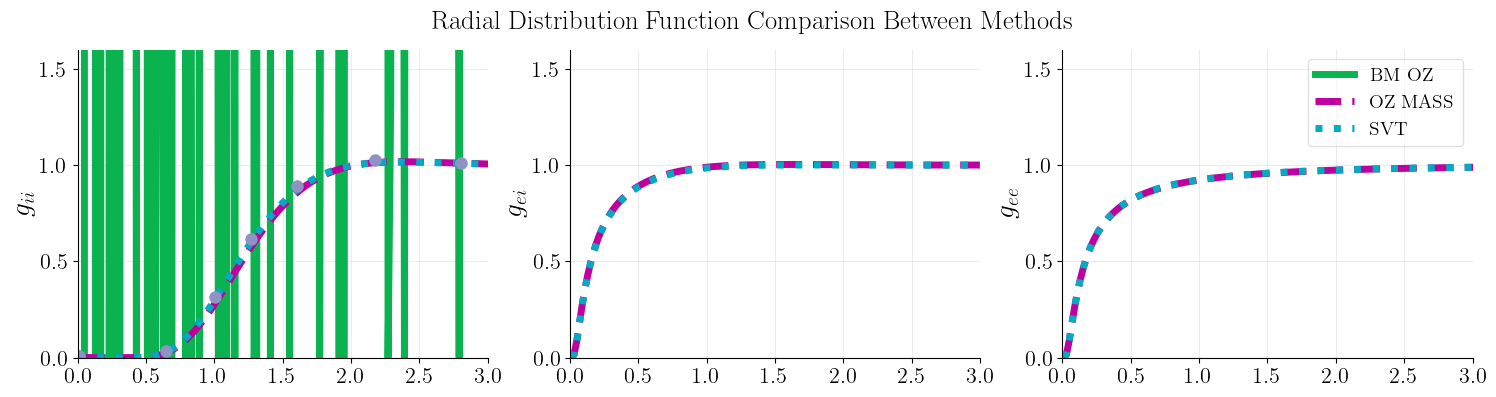

In [11]:
fig, axs = plt.subplots(1,3, figsize=(18,4))
fig.suptitle("Radial Distribution Function Comparison Between Methods")

ax = axs[0]
ax.plot(iet.r_array, iet.h_r_matrix[1,1]+1,'-', label='BM OZ',linewidth=5)
ax.plot(oz.r_array, oz.h_r_matrix[1,1]+1,'--', label="OZ MASS",linewidth=5)
ax.plot(svt.r_array, svt.h_r_matrix[1,1]+1,':', label="SVT", linewidth=5)
ax.plot(gii_data['r/a'], gii_data['gii'],'o', label="Shaffer")
ax.set_ylabel(r'$g_{ii}$')

ax = axs[1]
ax.plot(iet.r_array, iet.h_r_matrix[0,1]+1,'-', label='BM OZ',linewidth=5)
ax.plot(oz.r_array, oz.h_r_matrix[0,1]+1,'--', label="OZ MASS",linewidth=5)
ax.plot(svt.r_array, svt.h_r_matrix[0,1]+1,':', label="SVT", linewidth=5)
# ax.plot(gei_data['r/a'], gei_data['gei'],'o', label="Shaffer")
ax.set_ylabel(r'$g_{ei}$')


ax = axs[2]
ax.plot(iet.r_array, iet.h_r_matrix[0,0]+1,'-', label='BM OZ',linewidth=5)
ax.plot(oz.r_array, oz.h_r_matrix[0,0]+1,'--', label="OZ MASS",linewidth=5)
ax.plot(svt.r_array, svt.h_r_matrix[0,0]+1,':', label="SVT", linewidth=5)
# ax.plot(gee_data['r/a'], gee_data['gee'],'o', label="Shaffer")
ax.set_ylabel(r'$g_{ee}$')

for ax in axs:
    ax.set_xlim(0,3)
    ax.set_ylim(0,1.6)
ax.legend()

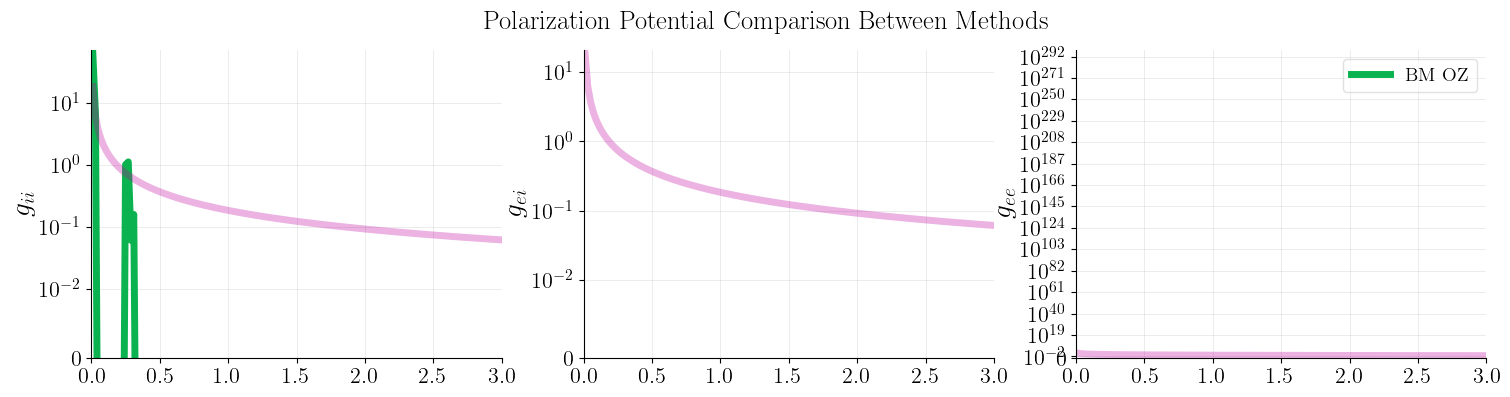

In [12]:
fig, axs = plt.subplots(1,3, figsize=(18,4))
fig.suptitle("Polarization Potential Comparison Between Methods")

ax = axs[0]
ax.plot(iet.r_array, iet.U_r_matrix[1,1],'-', label='BM OZ',linewidth=5)
ax.plot(iet.r_array, iet.u_r_matrix[1,1],'-',linewidth=5,alpha=0.3)
# ax.plot(oz.r_array, oz.U_r_matrix[1,1],'--', label="OZ MASS",linewidth=5)
# ax.plot(oz.r_array, oz.u_r_matrix[1,1],'--',linewidth=5,alpha=0.3)
# ax.plot(svt.r_array, svt.U_r_matrix[1,1],':', label="SVT", linewidth=5)
# ax.plot(svt.r_array, svt.u_r_matrix[1,1],':', linewidth=5,alpha=0.3)
ax.set_ylabel(r'$g_{ii}$')

ax = axs[1]
ax.plot(iet.r_array, iet.U_r_matrix[0,1]+1,'-', label='BM OZ',linewidth=5)
ax.plot(iet.r_array, iet.u_r_matrix[0,1],'-',linewidth=5,alpha=0.3)
# ax.plot(oz.r_array, oz.U_r_matrix[0,1]+1,'--', label="OZ MASS",linewidth=5)
# ax.plot(oz.r_array, oz.u_r_matrix[0,1],'--',linewidth=5,alpha=0.3)
# ax.plot(svt.r_array, svt.U_r_matrix[0,1]+1,':', label="SVT", linewidth=5)
# ax.plot(svt.r_array, svt.u_r_matrix[0,1],':', linewidth=5,alpha=0.3)
ax.set_ylabel(r'$g_{ei}$')


ax = axs[2]
ax.plot(iet.r_array, iet.U_r_matrix[0,0]+1,'-', label='BM OZ',linewidth=5)
ax.plot(iet.r_array, iet.u_r_matrix[0,0],'-',linewidth=5,alpha=0.3)
# ax.plot(oz.r_array, oz.U_r_matrix[0,0]+1,'--', label="OZ MASS",linewidth=5)
# ax.plot(oz.r_array, oz.u_r_matrix[0,0],'--',linewidth=5,alpha=0.3)
# ax.plot(svt.r_array, svt.U_r_matrix[0,0]+1,':', label="SVT", linewidth=5)
# ax.plot(svt.r_array, svt.u_r_matrix[0,0],':', linewidth=5,alpha=0.3)
ax.set_ylabel(r'$g_{ee}$')

for ax in axs:
    ax.set_xlim(0,3)
    ax.set_ylim(0,None)
    ax.set_yscale('symlog',linthresh=0.01)
ax.legend()


### Single Species Check

In [13]:
# n_in_rs_array = np.array([ 3/(4*π), 3/(4*π)] )
# T_AU_array = np.array([Te, Ti])
# mass_array = np.array([m_e, m_i])
# iet = IET(1, n_in_rs_array[0:1], T_AU_array[0:1], mass_array[0:1], κ_screen=0 )

# iet.HNC_solve(num_iterations=1e4, tol=1e-6, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
#         alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [14]:
# iet.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::10]))

In [15]:
# fig, ax =  iet.plot_u_all_species()
# ax.plot(iet.r_array, iet.U_r_matrix[0,0])


## Check Michael OCP [DOI: 10.3847/0004-637X/829/1/16](https://iopscience.iop.org/article/10.3847/0004-637X/829/1/16)

In [16]:
Γ11 = 20

T1 = 10*eV_to_AU
T2 = 10*eV_to_AU

Z1, Z2 = 1, 3
x1, x2 = 0.9, 0.1

r1 = Z1**2/T1/Γ11

n1 = n_from_rs(r1)

n = n1/x1
n2 = n*x2
r2 = rs_from_n(n2)
r12 = rs_from_n(n1 + n2)

print(f"T_1 = {T1*AU_to_K:0.2f} [K]")
print(f"T_2 = {T2*AU_to_K:0.2f} [K]")

m_1 = m_e*1
m_2 = m_e*1

Qsquare_matrix = np.array( [[Z1**2, Z1*Z2 ],[Z1*Z2, Z2**2]])
Qsquare_matrix


T_1 = 116045.25 [K]
T_2 = 116045.25 [K]


array([[1, 3],
       [3, 9]])

In [17]:
# n_in_rs_array = 0.9*np.array([ 3/(4*π), 3/(4*π*r2**3/r1**3)] )
n_in_rs_array = np.array([ 3/(4*π*r1**3/r12**3), 3/(4*π*r2**3/r12**3)] )
T_AU_array = np.array([T1, T2])
mass_array = np.array([m_1, m_2])

κ_screen = 0
κ_multiscale = 0.0

R_max, N_bins = 10, 500
dst_type =3

# New solver
iet = IET(2, n_in_rs_array, T_AU_array, κ_screen=0.0, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, dst_type = dst_type )
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/r12 * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

# Old solver
T12 = (T1*m_2 + T2*m_1)/(m_1 + m_2) 
T_SVT_matrix = np.array( [[T1, T12 ],[T12, T2  ]]  )
oz = OZ(2, np.ones((2,2)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((2,2)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/r12* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))


In [18]:
iet.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 2.104e+02
1: Change in U_r: 9.568e-02, HNC Error: 9.531e-01, Total Error: 1.938e+02
2: Change in U_r: 9.447e-02, HNC Error: 9.534e-01, Total Error: 1.785e+02
3: Change in U_r: 9.332e-02, HNC Error: 9.537e-01, Total Error: 1.643e+02
4: Change in U_r: 9.222e-02, HNC Error: 9.541e-01, Total Error: 1.513e+02
5: Change in U_r: 9.117e-02, HNC Error: 9.545e-01, Total Error: 1.392e+02
6: Change in U_r: 9.016e-02, HNC Error: 9.550e-01, Total Error: 1.281e+02
7: Change in U_r: 8.921e-02, HNC Error: 9.555e-01, Total Error: 1.179e+02
8: Change in U_r: 8.830e-02, HNC Error: 9.560e-01, Total Error: 1.085e+02
9: Change in U_r: 8.743e-02, HNC Error: 9.566e-01, Total Error: 9.984e+01
10: Change in U_r: 8.662e-02, HNC Error: 9.573e-01, Total Error: 9.188e+01
11: Change in U_r: 8.585e-02, HNC Error: 9.580e-01, Total Error: 8.457e+01
12: Change in U_r: 8.512e-02, HNC Error: 9.587e-01, Total Error: 7.785e+01
13: Change in U_r: 8.444e-02, HNC Error: 9.595e-01, Total Error: 

0

In [19]:
oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 2.104e+02
1: Change in c_r: 2.603e-01, HNC Error: 4.216e-02, Total Error: 1.938e+02
2: Change in c_r: 2.571e-01, HNC Error: 3.569e-02, Total Error: 1.785e+02
3: Change in c_r: 2.539e-01, HNC Error: 3.180e-02, Total Error: 1.643e+02
4: Change in c_r: 2.509e-01, HNC Error: 2.915e-02, Total Error: 1.513e+02
5: Change in c_r: 2.481e-01, HNC Error: 2.722e-02, Total Error: 1.392e+02
6: Change in c_r: 2.453e-01, HNC Error: 2.564e-02, Total Error: 1.281e+02
7: Change in c_r: 2.427e-01, HNC Error: 2.424e-02, Total Error: 1.179e+02
8: Change in c_r: 2.403e-01, HNC Error: 2.329e-02, Total Error: 1.085e+02
9: Change in c_r: 2.379e-01, HNC Error: 2.264e-02, Total Error: 9.984e+01
10: Change in c_r: 2.357e-01, HNC Error: 2.234e-02, Total Error: 9.188e+01
11: Change in c_r: 2.336e-01, HNC Error: 2.188e-02, Total Error: 8.457e+01
12: Change in c_r: 2.316e-01, HNC Error: 2.156e-02, Total Error: 7.785e+01
13: Change in c_r: 2.298e-01, HNC Error: 2.147e-02, Total Error: 

0

Text(0.5, 1.0, 'Now digitize data and compare...')

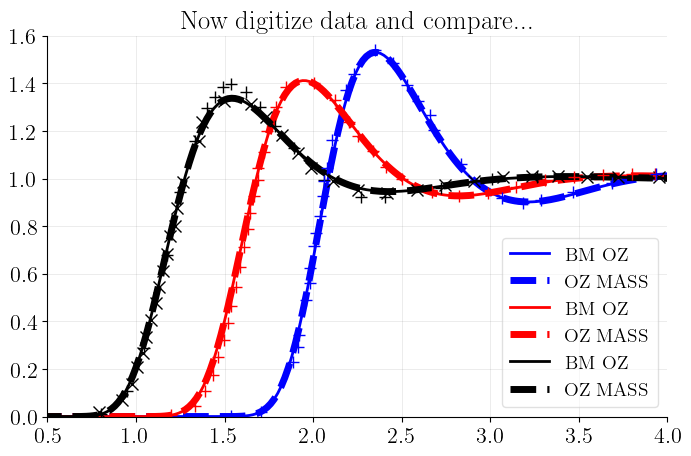

In [20]:
g11_data = read_csv("Ichimaru1993_Fig6_g11.txt", delim_whitespace=True, header=2)
g12_data = read_csv("Diaw2016_Fig4_g12.txt", delim_whitespace=True, header=2)
g22_data = read_csv("Diaw2016_Fig4_g22.txt", delim_whitespace=True, header=2)


fig, ax = plt.subplots()

ax.plot(iet.r_array, iet.h_r_matrix[1,1]+1,'b-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[1,1]+1,'b--', label="OZ MASS",linewidth=5)

ax.plot(iet.r_array, iet.h_r_matrix[1,0]+1,'r-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[1,0]+1,'r--', label="OZ MASS",linewidth=5)

ax.plot(iet.r_array, iet.h_r_matrix[0,0]+1,'k-', label='BM OZ',linewidth=2)
ax.plot(oz.r_array, oz.h_r_matrix[0,0]+1,'k--', label="OZ MASS",linewidth=5)


g11_data = read_csv("Ichimaru1993_Fig6_g11.txt", delim_whitespace=True, header=2)
ax.plot(g11_data['r/a'], g11_data['g11(r)'],'k+')
g11_data = read_csv("Diaw2016_Fig4_g11.txt", delim_whitespace=True, header=2)
ax.plot(g11_data['r/a'], g11_data['g11(r)'],'kx')


ax.plot(g12_data['r/a'], g12_data['g12(r)'],'r+')
ax.plot(g22_data['r/a'], g22_data['g22(r)'],'b+')

ax.set_xlim(0.5,4)
ax.set_ylim(0,1.6)
ax.legend()

ax.set_title("Now digitize data and compare...")

axs


/home/zach/plasma/hnc/hnc/hnc_BandM.py:1049: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,10)


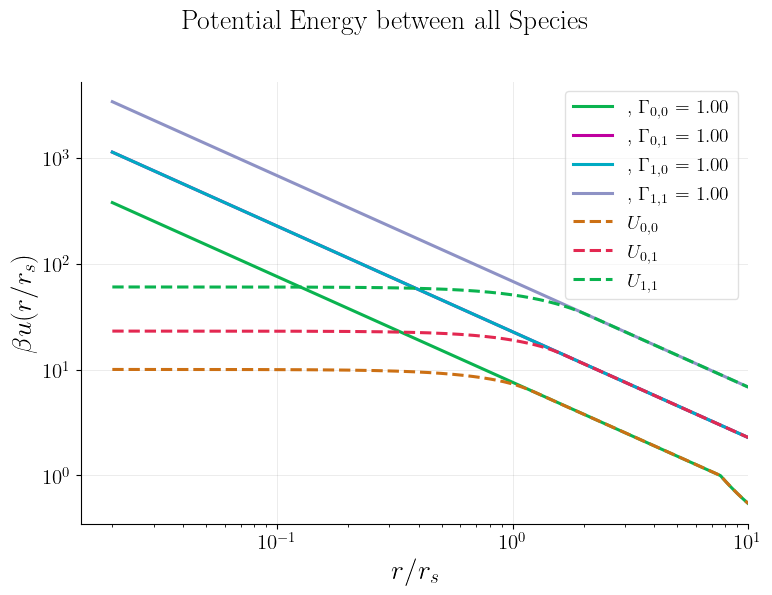

In [21]:
fig, ax =  iet.plot_u_all_species()
ax.plot(iet.r_array, iet.U_r_matrix[0,0],'--', label=r"$U_{0,0}$")
ax.plot(iet.r_array, iet.U_r_matrix[0,1],'--', label=r"$U_{0,1}$")
ax.plot(iet.r_array, iet.U_r_matrix[1,1],'--', label=r"$U_{1,1}$")
plt.legend(loc='upper right')

In [22]:
test_HNC(iet)
# test_BMOZ(iet)

NameError: name 'test_HNC' is not defined

## Check OCP [DOI: 10.3847/0004-637X/829/1/16](https://iopscience.iop.org/article/10.3847/0004-637X/829/1/16)

In [ ]:
Γe = 100
Te = 10*eV_to_AU

Ze = 1

re = Ze**2/Te/Γe

ne = n_from_rs(re)

print(f"T_e = {Te*AU_to_K:0.2f} [K]")

Qsquare_matrix = np.array( [[Ze**2]])
Qsquare_matrix


In [ ]:
n_in_rs_array = np.array([ 3/(4*π)] )
T_AU_array = np.array([Te])
mass_array = np.array([m_e])

κ_screen = 2
κ_multiscale = 0.0

R_max, N_bins = 20, 1000
dst_type = 3

# New solver
iet = IET(1, n_in_rs_array, T_AU_array, κ_screen=0.0, kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, use_U00_closure=False, dst_type = dst_type )
iet.set_u_matrix(Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/re * np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))

# Old solver
T_SVT_matrix = np.array( [[Te]]  )
oz = OZ(1, np.ones((1,1)) , n_in_rs_array, T_SVT_matrix, mass_array, kappa=np.zeros((1,1)), kappa_multiscale=κ_multiscale , R_max=R_max, N_bins=N_bins, oz_method='standard', dst_type = dst_type)
oz.set_βu_matrix(1/T_SVT_matrix[:,:,np.newaxis]*Qsquare_matrix[:,:,np.newaxis]/iet.r_array[np.newaxis,np.newaxis,:]/re* np.exp(-iet.r_array[np.newaxis,np.newaxis,:]*κ_screen))


In [ ]:
iet.HNC_solve(num_iterations=1e4, tol=1e-9, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [ ]:
oz.HNC_solve(num_iterations=1e4, tol=1e-4, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-1, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [ ]:
gii_data = read_csv("Bonitz2018_Fig3_Γ=100-HNC.txt", delim_whitespace=True, header=2)

fig, ax = plt.subplots()

ax.plot(iet.r_array, iet.h_r_matrix[0,0]+1,'-', label='BM OZ',linewidth=3)
ax.plot(oz.r_array, oz.h_r_matrix[0,0]+1,'--', label="OZ MASS",linewidth=3)
ax.plot(gii_data['r/a'], gii_data['gii'],'k+', label="Bonitz 2018")

# ax.plot(svt.r_array, svt.h_r_matrix[1,1]+1,':', label="SVT", linewidth=5)

ax.set_xlim(0.5,4)
ax.set_ylim(0,1.55)
ax.legend()

In [ ]:
from scipy.interpolate import interp1d
def test_BMOZ(iet):
    cosθ_space = np.linspace(-1,1, num=1000)
    r_space = np.linspace(iet.r_array[0],iet.r_array[-1]/2, num=200)

    cosθ_mesh, r_mesh = np.meshgrid(cosθ_space, r_space, indexing='ij')

    drdcosθ = (r_space[1]-r_space[0]) * (cosθ_space[1]-cosθ_space[0])
    geom = drdcosθ*r_space**2*2*π


    def integrate_f1_f2(r_input, r_array, f1, f2):
        f1_interp = interp1d(r_array, f1, fill_value='extrapolate', bounds_error=False)
        f2_interp = interp1d(r_array, f2, fill_value='extrapolate', bounds_error=False)

        r1 = r_mesh
        r2 = np.sqrt(r_mesh**2 + r_input**2 + 2*cosθ_mesh*r_mesh*r_input )
        return np.sum(geom*f1_interp(r1)*f2_interp(r2))

    def get_lhs_rhs_i_j(i,j):
        rhs = np.zeros_like(iet.r_array)
        lhs = np.zeros_like(iet.r_array)
        for k in range(iet.N_species):
            rhs += -iet.rho[k]*np.array( [integrate_f1_f2(r, iet.r_array, iet.h_r_matrix[i,k], iet.β_list[k]*iet.U_r_matrix[k,j]) for r in iet.r_array])

        lhs = iet.h_r_matrix[i,j] + iet.β_list[j]*iet.U_r_matrix[i,j]
        return lhs, rhs
    
    
    # Plot
    fig, ax = plt.subplots()

    for i in range(iet.N_species):
        for j in range(iet.N_species):
            color = colors[j + iet.N_species*i]
            rhs, lhs = get_lhs_rhs_i_j(i,j)
            ax.plot(iet.r_array, rhs,'-', color=color, label=f'rhs ({i},{j})')
            ax.plot(iet.r_array, lhs,'--',color=color, label=f'lhs ({i},{j})')
            # Error estimate
            error_est = np.linalg.norm(rhs-lhs)/np.linalg.norm(lhs)
            print("{0}-{1} Estimated total OZ error: {2:.3e}".format(i,j,error_est))

    
    ax.set_yscale('symlog',linthresh=0.001)
    ax.legend()
    ax.set_title("BM OZ test LHS vs RHS")
    ax.set_ylabel("OZ sides")
    ax.set_xlabel(r"$r/r_i$")

def test_HNC(iet):
    lhs = (iet.h_r_matrix + 1)
    rhs = np.exp( -iet.β_list[np.newaxis,:,np.newaxis]*iet.u_r_matrix + iet.h_r_matrix + iet.β_list[np.newaxis,:,np.newaxis]*iet.U_r_matrix )
    error = np.linalg.norm(lhs-rhs)/np.linalg.norm(lhs)
    print(f"HNC error: {error:0.3e}")

test_BMOZ(iet)
test_HNC(iet)

# iet.h_r_matrix  + iet.β_list[np.newaxis,:,np.newaxis] * iet.U_r_matrix - iet.A_times_B(iet.h_r_matrix, iet.rho[:, np.newaxis,np.newaxis]*iet.β_list[np.newaxis,:,np.newaxis] * iet.U_r_matrix)  